In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
from statsmodels.graphics.factorplots import interaction_plot
from statsmodels.formula.api import ols
from statsmodels.graphics.gofplots import qqplot

In [2]:
df = pd.read_csv('MDf_NAFilled.csv')
df

,Unnamed: 0,Unnamed: 0.1,ADMID,PATIENTID,Average_Age,PROBLEM,PROB_NAME,ADM_DATE,DIS_DATE,LOS,...,Ionised calcium,Lactate,White cell,DBP,HEIGHT,HR,O2SAT,RR,SBP,WEIGHT
0,0,0,566AF9016D2E9318EA7A3B3B8EF4441ABFE079F185CDB2...,3AB8F46DDDA4CC8466E3146BB26D8B5BD9E3B72D64EF22...,92,700097003.0,Hip fracture,35550,35565,15,...,1.220000,2.200000,12.270000,64.0,67.200000,80.0,96.0,14.0,141.0,69.999200
1,1,1,9997C278C602FABFE2BBDFAB818D67EF9C940418C75763...,D10067B6DE953CD140EBEFCEE70698B0CAEFF1BB557252...,82,700097003.0,Hip fracture,31824,31858,34,...,1.172366,1.787164,10.382805,62.0,62.008000,90.0,96.0,15.0,114.0,63.219396
2,2,2,9997C278C602FABFE2BBDFAB818D67EF9C940418C75763...,D10067B6DE953CD140EBEFCEE70698B0CAEFF1BB557252...,82,5913000.0,Fracture of neck of left femur,31824,31858,34,...,1.172366,1.787164,10.382805,62.0,62.008000,90.0,96.0,15.0,114.0,63.219396
3,3,3,A53241F3859B28AC2E43A68B8B24BE5806EA1341B1D16D...,4801FB1837D0F9A5F6041D39E48A72E9AC054365A4D202...,77,127287001.0,Intertrochanteric fracture of left hip,30203,30205,2,...,1.172366,1.787164,8.600000,63.0,64.790197,74.0,93.0,15.0,104.0,63.219396
4,4,4,BFA87E0D17A3084607B9439431707EEE54189FAC5AE26C...,CA5F39A757C1E534F2A95B3C730401ADEC3422C54A3F70...,82,127287001.0,Intertrochanteric fracture of left hip,32191,32196,5,...,1.230000,1.400000,12.870000,67.0,64.790197,91.0,100.0,15.0,112.0,63.219396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1203,1203,1447,5264ED483D6DD14F34C7F41DBF5075B1812CB3149AB7F7...,59F3A979B8E5C797D425696F17530AC9EA020C2DCB9195...,82,700097003.0,"Hip fracture, right",31577,31594,17,...,1.120000,0.900000,11.700000,44.0,64.790197,96.0,97.0,16.0,98.0,63.219396
1204,1204,1448,9D04FE81A460B8242DC9548F2CD8921F4E0936A888C8A3...,222C0D67EE0A7D3722DFC9745E76074612AC706520EF06...,82,5913000.0,Fracture of neck of left femur,32235,32251,16,...,1.172366,1.787164,10.382805,54.0,64.790197,109.0,95.0,16.0,112.0,63.219396
1205,1205,1449,665FFC079CC5ACD04A4F6A7F7FF724897586A3AC6625B8...,92CF2F32964A9F8CAD9DF05CF7EBE8D7E3B5B1729C7AE1...,87,5913000.0,Fracture of neck of right femur,34372,34381,9,...,1.172366,1.787164,10.382805,50.0,64.790197,73.0,98.0,16.0,123.0,63.219396
1206,1206,1450,5FDAC7A8655D26734D99CE76A5CCDCDBC08243A5F0D860...,C77CE976D4B2D0F75FD3CF77B7119E4AC9208FE374097F...,92,5913000.0,Fracture of neck of left femur,35807,35814,7,...,1.172366,1.787164,13.000000,60.0,60.000000,91.0,97.0,15.0,114.0,63.219396


In [3]:
list(df.columns.values)

['Unnamed: 0',
 'Unnamed: 0.1',
 'ADMID',
 'PATIENTID',
 'Average_Age',
 'PROBLEM',
 'PROB_NAME',
 'ADM_DATE',
 'DIS_DATE',
 'LOS',
 'OPCS_CODE',
 'OPCS_DESC',
 'OP_STRT_DATE',
 'OP_STRT_TIME',
 'OP_END_TIME',
 'OP_Time',
 'Days_To_Op',
 'CANCER',
 'GENDER',
 'ETHNICITY',
 'DOD',
 'Passed_Vs_Adm',
 'MED_HX_NAME',
 'Creatinine',
 'Glucose',
 'Haemoglobin',
 'Ionised calcium',
 'Lactate',
 'White cell',
 'DBP',
 'HEIGHT',
 'HR',
 'O2SAT',
 'RR',
 'SBP',
 'WEIGHT']

In [4]:
from statsmodels.formula.api import ols 
from statsmodels.stats.anova import anova_lm 
from statsmodels.tools.eval_measures import aic

In [5]:
lm_cat = ols('LOS ~ CANCER + OPCS_DESC + Average_Age + CANCER:OPCS_DESC + CANCER:Average_Age + OPCS_DESC:Average_Age + OPCS_DESC:CANCER:Average_Age ', data=df).fit()

In [6]:
lm_cat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    LOS   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     3.505
Date:                Thu, 20 Apr 2023   Prob (F-statistic):           6.37e-12
Time:                        11:20:24   Log-Likelihood:                -4541.2
No. Observations:                1208   AIC:                             9162.
Df Residuals:                    1168   BIC:                             9366.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
======================================================================================================================================================================================
                                                                                                                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                                                             -3.4133      8.525     -0.400      0.689     -20.139      13.313
CANCER[T.Y]                                                                                                            4.8367     10.747      0.450      0.653     -16.250      25.923
OPCS_DESC[T.HEMIARTHROPLASTY HIP CANNULOK]                                                                          -120.9117    126.303     -0.957      0.339    -368.718     126.894
OPCS_DESC[T.HEMIARTHROPLASTY HIP CEMENTED USING EXETER STEM]                                                         -16.2611     16.166     -1.006      0.315     -47.979      15.457
OPCS_DESC[T.HEMIARTHROPLASTY HIP CEMENTED USING EXETER TRAUMA STEM]                                                    5.6004     20.710      0.270      0.787     -35.033      46.234
OPCS_DESC[T.OPEN REDUCTION INTERNAL FIXATION FEMUR]                                                                   -7.8893     29.833     -0.264      0.791     -66.421      50.642
OPCS_DESC[T.OPEN REDUCTION INTERNAL FIXATION FEMUR USING RIGID NAIL]                                                  23.9807     17.418      1.377      0.169     -10.194      58.155
OPCS_DESC[T.OPEN REDUCTION INTERNAL FIXATION FRACTURE NECK OF FEMUR WITH HIP SCREW]                                    1.1139     11.008      0.101      0.919     -20.484      22.711
OPCS_DESC[T.OPEN REDUCTION INTERNAL FIXATION TROCHANTERIC FRACTURE FEMUR USING RIGID NAIL]                            47.2133     25.701      1.837      0.066      -3.212      97.638
OPCS_DESC[T.TOTAL HIP REPLACEMENT]                                                                                     5.9004     21.243      0.278      0.781     -35.779      47.580
OPCS_DESC[T.TOTAL HIP REPLACEMENT CEMENTED]                                                                           -5.8250     41.752     -0.140      0.889     -87.742      76.092
OPCS_DESC[T.TOTAL HIP REPLACEMENT EXETER CUP EXETER STEM]                                                            -22.4450     31.363     -0.716      0.474     -83.980      39.090
CANCER[T.Y]:OPCS_DESC[T.HEMIARTHROPLASTY HIP CANNULOK]                                                              -120.9117    126.303     -0.957      0.339    -368.718     126.894
CANCER[T.Y]:OPCS_DESC[T.HEMIARTHROPLASTY HIP CEMENTED USING EXETER STEM]                                              37.6321     18.470      2.037      0.

In [7]:
lm_cat.aic 

9162.39927961709

In [8]:
lm_cat1 = ols('LOS ~ CANCER + OPCS_DESC + Average_Age + CANCER:OPCS_DESC + CANCER:Average_Age ', data=df).fit()

In [9]:
lm_cat2 = ols('LOS ~ CANCER + OPCS_DESC + Average_Age + CANCER:OPCS_DESC + OPCS_DESC:Average_Age', data=df).fit()

In [10]:
lm_cat3 = ols('LOS ~ CANCER + OPCS_DESC + Average_Age + CANCER:Average_Age + OPCS_DESC:Average_Age', data=df).fit()

In [11]:
lm_cat1.aic

9155.776331815132

In [12]:
lm_cat2.aic

9157.970805720168

In [13]:
lm_cat3.aic #Lowest AIC

9147.000862442124

In [14]:
lm_cat4 = ols('LOS ~ CANCER + OPCS_DESC + Average_Age + CANCER:Average_Age ', data=df).fit()

In [15]:
lm_cat5 = ols('LOS ~ CANCER + OPCS_DESC + Average_Age + OPCS_DESC:Average_Age', data=df).fit()

In [16]:
lm_cat4.aic #Lowest AIC

9143.670903285401

In [17]:
lm_cat5.aic

9145.034333047914

In [18]:
lm_cat6 = ols('LOS ~ CANCER + Average_Age + CANCER:Average_Age ', data=df).fit()

In [19]:
lm_cat7 = ols('LOS ~ CANCER + OPCS_DESC + Average_Age ', data=df).fit()

In [20]:
lm_cat6.aic

9155.20573586988

In [21]:
lm_cat6.aic 

9155.20573586988

In [22]:
# lm_cat4 is the best model and the Cancer & Average Age ineraction is signifcant
lm_cat4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    LOS   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     7.963
Date:                Thu, 20 Apr 2023   Prob (F-statistic):           1.87e-15
Time:                        11:20:33   Log-Likelihood:                -4557.8
No. Observations:                1208   AIC:                             9144.
Df Residuals:                    1194   BIC:                             9215.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================================================================================================
                                                                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                                      1.1958      4.312      0.277      0.782      -7.263       9.655
CANCER[T.Y]                                                                                    4.1397      5.077      0.815      0.415      -5.821      14.101
OPCS_DESC[T.HEMIARTHROPLASTY HIP CANNULOK]                                                    12.7437      7.531      1.692      0.091      -2.031      27.518
OPCS_DESC[T.HEMIARTHROPLASTY HIP CEMENTED USING EXETER STEM]                                  -0.4660      0.935     -0.498      0.618      -2.301       1.369
OPCS_DESC[T.HEMIARTHROPLASTY HIP CEMENTED USING EXETER TRAUMA STEM]                            1.1449      1.226      0.934      0.350      -1.260       3.550
OPCS_DESC[T.OPEN REDUCTION INTERNAL FIXATION FEMUR]                                           -0.2477      3.153     -0.079      0.937      -6.435       5.939
OPCS_DESC[T.OPEN REDUCTION INTERNAL FIXATION FEMUR USING RIGID NAIL]                          -0.6542      1.649     -0.397      0.692      -3.890       2.582
OPCS_DESC[T.OPEN REDUCTION INTERNAL FIXATION FRACTURE NECK OF FEMUR WITH HIP SCREW]           -1.0689      0.968     -1.105      0.270      -2.967       0.829
OPCS_DESC[T.OPEN REDUCTION INTERNAL FIXATION TROCHANTERIC FRACTURE FEMUR USING RIGID NAIL]    -0.7343      4.081     -0.180      0.857      -8.741       7.272
OPCS_DESC[T.TOTAL HIP REPLACEMENT]                                                            -5.9228      1.585     -3.736      0.000      -9.033      -2.813
OPCS_DESC[T.TOTAL HIP REPLACEMENT CEMENTED]                                                   -8.1965      2.567     -3.193      0.001     -13.233      -3.160
OPCS_DESC[T.TOTAL HIP REPLACEMENT EXETER CUP EXETER STEM]                                     -6.1595      6.178     -0.997      0.319     -18.281       5.961
Average_Age                                                                                    0.1511      0.052      2.879      0.004       0.048       0.254
CANCER[T.Y]:Average_Age                                                                       -0.0100      0.062     -0.161      0.872      -0.132       0.112
==============================================================================
Omnibus:                      538.928   Durbin-Watson:                   1.689
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2733.439
Skew:                           2.064   Prob(JB):                         0.00
Kurtosis:                       9.104   Cond. No.               

In [23]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [24]:
aov_table = anova_lm(lm_cat4,typ=1)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
CANCER,1.0,3351.253328,3351.253328,29.881049,5.588958e-08
OPCS_DESC,10.0,5564.003832,556.400383,4.961077,4.488285e-07
Average_Age,1.0,2691.807821,2691.807821,24.001182,1.095129e-06
CANCER:Average_Age,1.0,2.897968,2.897968,0.025839,8.723204e-01
Residual,1194.0,133910.841685,112.153134,NaN,NaN


In [25]:
df = df.rename(columns={'Ionised calcium': 'Ca', 'White cell': 'WCC'})
list(df.columns.values)

['Unnamed: 0',
 'Unnamed: 0.1',
 'ADMID',
 'PATIENTID',
 'Average_Age',
 'PROBLEM',
 'PROB_NAME',
 'ADM_DATE',
 'DIS_DATE',
 'LOS',
 'OPCS_CODE',
 'OPCS_DESC',
 'OP_STRT_DATE',
 'OP_STRT_TIME',
 'OP_END_TIME',
 'OP_Time',
 'Days_To_Op',
 'CANCER',
 'GENDER',
 'ETHNICITY',
 'DOD',
 'Passed_Vs_Adm',
 'MED_HX_NAME',
 'Creatinine',
 'Glucose',
 'Haemoglobin',
 'Ca',
 'Lactate',
 'WCC',
 'DBP',
 'HEIGHT',
 'HR',
 'O2SAT',
 'RR',
 'SBP',
 'WEIGHT']

In [26]:
lm_full = ols('LOS ~ CANCER + OPCS_DESC + Average_Age + MED_HX_NAME + Lactate + Haemoglobin + Creatinine + WEIGHT + CANCER:Average_Age + Lactate:Haemoglobin + Lactate:Creatinine + Lactate:WEIGHT + Haemoglobin:Creatinine + Creatinine:WEIGHT + CANCER:MED_HX_NAME+ Average_Age:MED_HX_NAME + MED_HX_NAME:Lactate + MED_HX_NAME:Haemoglobin + MED_HX_NAME:Creatinine',data=df).fit()



In [27]:
lm_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    LOS   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     5.101
Date:                Thu, 20 Apr 2023   Prob (F-statistic):           1.01e-15
Time:                        11:20:49   Log-Likelihood:                -4541.4
No. Observations:                1208   AIC:                             9139.
Df Residuals:                    1180   BIC:                             9281.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================================================================================================
                                                                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                                     18.7632     10.838      1.731      0.084      -2.500      40.027
CANCER[T.Y]                                                                                   -1.3219      5.866     -0.225      0.822     -12.830      10.186
OPCS_DESC[T.HEMIARTHROPLASTY HIP CANNULOK]                                                    13.1471      7.507      1.751      0.080      -1.581      27.875
OPCS_DESC[T.HEMIARTHROPLASTY HIP CEMENTED USING EXETER STEM]                                   0.0276      0.941      0.029      0.977      -1.819       1.874
OPCS_DESC[T.HEMIARTHROPLASTY HIP CEMENTED USING EXETER TRAUMA STEM]                            1.5833      1.229      1.288      0.198      -0.829       3.995
OPCS_DESC[T.OPEN REDUCTION INTERNAL FIXATION FEMUR]                                            0.5385      3.163      0.170      0.865      -5.667       6.744
OPCS_DESC[T.OPEN REDUCTION INTERNAL FIXATION FEMUR USING RIGID NAIL]                          -0.5606      1.646     -0.341      0.733      -3.790       2.669
OPCS_DESC[T.OPEN REDUCTION INTERNAL FIXATION FRACTURE NECK OF FEMUR WITH HIP SCREW]           -0.9545      0.967     -0.988      0.324      -2.851       0.942
OPCS_DESC[T.OPEN REDUCTION INTERNAL FIXATION TROCHANTERIC FRACTURE FEMUR USING RIGID NAIL]    -0.8500      4.058     -0.209      0.834      -8.813       7.113
OPCS_DESC[T.TOTAL HIP REPLACEMENT]                                                            -5.0699      1.587     -3.194      0.001      -8.184      -1.955
OPCS_DESC[T.TOTAL HIP REPLACEMENT CEMENTED]                                                   -7.5278      2.555     -2.946      0.003     -12.541      -2.515
OPCS_DESC[T.TOTAL HIP REPLACEMENT EXETER CUP EXETER STEM]                                     -5.6612      6.135     -0.923      0.356     -17.698       6.375
Average_Age                                                                                    0.1339      0.053      2.529      0.012       0.030       0.238
CANCER[T.Y]:Average_Age                                                                        0.0441      0.072      0.614      0.539      -0.097       0.185
MED_HX_NAME                                                                                    0.0905      0.537      0.169      0.866      -0.962       1.143
CANCER[T.Y]:MED_HX_NAME                                                                        0.0905      0.537      0.169      0.866      -0.962       1.143
Lactate                                                       

In [28]:
lm_full.aic

9138.756637769986

In [29]:
aov_table = anova_lm(lm_full,typ=1)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
CANCER,1.0,3351.253328,3351.253328,30.346367,4.433201e-08
OPCS_DESC,10.0,5564.003832,556.400383,5.038333,3.292433e-07
Average_Age,1.0,2691.807821,2691.807821,24.374937,9.068496e-07
CANCER:Average_Age,1.0,2.897968,2.897968,0.026242,8.713390e-01
MED_HX_NAME,1.0,986.410151,986.410151,8.932170,2.859893e-03
CANCER:MED_HX_NAME,1.0,412.735818,412.735818,3.737417,5.344561e-02
Lactate,1.0,524.662365,524.662365,4.750938,2.947950e-02
Haemoglobin,1.0,436.411193,436.411193,3.951803,4.705195e-02
Creatinine,1.0,11.838128,11.838128,0.107197,7.434163e-01
WEIGHT,1.0,58.863596,58.863596,0.533023,4.654835e-01


In [30]:
lm_full1 = ols('LOS ~ CANCER + OPCS_DESC + Average_Age + MED_HX_NAME + Lactate + Haemoglobin + Creatinine + WEIGHT + CANCER:Average_Age + Lactate:Haemoglobin + Lactate:Creatinine + Lactate:WEIGHT + Haemoglobin:Creatinine + Creatinine:WEIGHT + CANCER:MED_HX_NAME+ Average_Age:MED_HX_NAME + MED_HX_NAME:Lactate + MED_HX_NAME:Haemoglobin',data=df).fit()


In [31]:
lm_full2 = ols('LOS ~ CANCER + OPCS_DESC + Average_Age + MED_HX_NAME + Lactate + Haemoglobin + Creatinine + WEIGHT + CANCER:Average_Age + Lactate:Haemoglobin + Lactate:Creatinine + Lactate:WEIGHT + Haemoglobin:Creatinine + Creatinine:WEIGHT + CANCER:MED_HX_NAME+ Average_Age:MED_HX_NAME + MED_HX_NAME:Lactate + MED_HX_NAME:Creatinine',data=df).fit()


In [32]:
lm_full3 = ols('LOS ~ CANCER + OPCS_DESC + Average_Age + MED_HX_NAME + Lactate + Haemoglobin + Creatinine + WEIGHT + CANCER:Average_Age + Lactate:Haemoglobin + Lactate:Creatinine + Lactate:WEIGHT + Haemoglobin:Creatinine + Creatinine:WEIGHT + CANCER:MED_HX_NAME+ Average_Age:MED_HX_NAME+ MED_HX_NAME:Haemoglobin + MED_HX_NAME:Creatinine',data=df).fit()


In [33]:
lm_full4 = ols('LOS ~ CANCER + OPCS_DESC + Average_Age + MED_HX_NAME + Lactate + Haemoglobin + Creatinine + WEIGHT + CANCER:Average_Age + Lactate:Haemoglobin + Lactate:Creatinine + Lactate:WEIGHT + Haemoglobin:Creatinine + Creatinine:WEIGHT + CANCER:MED_HX_NAME+ MED_HX_NAME:Lactate + MED_HX_NAME:Haemoglobin + MED_HX_NAME:Creatinine',data=df).fit()


In [34]:
lm_full5 = ols('LOS ~ CANCER + OPCS_DESC + Average_Age + MED_HX_NAME + Lactate + Haemoglobin + Creatinine + WEIGHT + CANCER:Average_Age + Lactate:Haemoglobin + Lactate:Creatinine + Lactate:WEIGHT + Haemoglobin:Creatinine + Creatinine:WEIGHT + Average_Age:MED_HX_NAME + MED_HX_NAME:Lactate + MED_HX_NAME:Haemoglobin + MED_HX_NAME:Creatinine',data=df).fit()


In [35]:
lm_full6 = ols('LOS ~ CANCER + OPCS_DESC + Average_Age + MED_HX_NAME + Lactate + Haemoglobin + Creatinine + WEIGHT + CANCER:Average_Age + Lactate:Haemoglobin + Lactate:Creatinine + Lactate:WEIGHT + Haemoglobin:Creatinine + CANCER:MED_HX_NAME+ Average_Age:MED_HX_NAME + MED_HX_NAME:Lactate + MED_HX_NAME:Haemoglobin + MED_HX_NAME:Creatinine',data=df).fit()


In [36]:
lm_full7 = ols('LOS ~ CANCER + OPCS_DESC + Average_Age + MED_HX_NAME + Lactate + Haemoglobin + Creatinine + WEIGHT + CANCER:Average_Age + Lactate:Haemoglobin + Lactate:Creatinine + Lactate:WEIGHT + Creatinine:WEIGHT + CANCER:MED_HX_NAME+ Average_Age:MED_HX_NAME + MED_HX_NAME:Lactate + MED_HX_NAME:Haemoglobin + MED_HX_NAME:Creatinine',data=df).fit()


In [37]:
lm_full8 = ols('LOS ~ CANCER + OPCS_DESC + Average_Age + MED_HX_NAME + Lactate + Haemoglobin + Creatinine + WEIGHT + CANCER:Average_Age + Lactate:Haemoglobin + Lactate:Creatinine + Haemoglobin:Creatinine + Creatinine:WEIGHT + CANCER:MED_HX_NAME+ Average_Age:MED_HX_NAME + MED_HX_NAME:Lactate + MED_HX_NAME:Haemoglobin + MED_HX_NAME:Creatinine',data=df).fit()


In [38]:
lm_full9 = ols('LOS ~ CANCER + OPCS_DESC + Average_Age + MED_HX_NAME + Lactate + Haemoglobin + Creatinine + WEIGHT + Lactate:WEIGHT + Haemoglobin:Creatinine + Creatinine:WEIGHT + CANCER:MED_HX_NAME+ Average_Age:MED_HX_NAME + MED_HX_NAME:Lactate + MED_HX_NAME:Haemoglobin + MED_HX_NAME:Creatinine',data=df).fit()


In [39]:
lm_full1.aic

9141.121264382971

In [40]:
lm_full2.aic

9138.784691971607

In [41]:
lm_full3.aic

9138.459985059755

In [42]:
lm_full4.aic

9137.973397236488

In [43]:
lm_full5.aic

9138.756637769986

In [44]:
lm_full6.aic

9139.205370823918

In [45]:
lm_full7.aic

9136.757283687053

In [46]:
lm_full8.aic

9136.787137137195

In [47]:
lm_full9.aic #Best 

9133.471806569893

In [48]:
lm_full10 = ols('LOS ~ CANCER + OPCS_DESC + Average_Age + MED_HX_NAME + Lactate + Haemoglobin + Creatinine + WEIGHT + Lactate:WEIGHT + Haemoglobin:Creatinine + Creatinine:WEIGHT + CANCER:MED_HX_NAME+ Average_Age:MED_HX_NAME + MED_HX_NAME:Lactate + MED_HX_NAME:Haemoglobin',data=df).fit()

In [49]:
lm_full11 = ols('LOS ~ CANCER + OPCS_DESC + Average_Age + MED_HX_NAME + Lactate + Haemoglobin + Creatinine + WEIGHT + Lactate:WEIGHT + Haemoglobin:Creatinine + Creatinine:WEIGHT + CANCER:MED_HX_NAME+ Average_Age:MED_HX_NAME + MED_HX_NAME:Lactate + MED_HX_NAME:Creatinine',data=df).fit()

In [50]:
lm_full12 = ols('LOS ~ CANCER + OPCS_DESC + Average_Age + MED_HX_NAME + Lactate + Haemoglobin + Creatinine + WEIGHT + Lactate:WEIGHT + Haemoglobin:Creatinine + Creatinine:WEIGHT + CANCER:MED_HX_NAME+ Average_Age:MED_HX_NAME + MED_HX_NAME:Haemoglobin + MED_HX_NAME:Creatinine',data=df).fit()

In [51]:
lm_full13 = ols('LOS ~ CANCER + OPCS_DESC + Average_Age + MED_HX_NAME + Lactate + Haemoglobin + Creatinine + WEIGHT + Lactate:WEIGHT + Haemoglobin:Creatinine + Creatinine:WEIGHT + CANCER:MED_HX_NAME + MED_HX_NAME:Lactate + MED_HX_NAME:Haemoglobin + MED_HX_NAME:Creatinine',data=df).fit()

In [52]:
lm_full14 = ols('LOS ~ CANCER + OPCS_DESC + Average_Age + MED_HX_NAME + Lactate + Haemoglobin + Creatinine + WEIGHT + Lactate:WEIGHT + Haemoglobin:Creatinine + Creatinine:WEIGHT + Average_Age:MED_HX_NAME + MED_HX_NAME:Lactate + MED_HX_NAME:Haemoglobin + MED_HX_NAME:Creatinine',data=df).fit()

In [53]:
lm_full15 = ols('LOS ~ CANCER + OPCS_DESC + Average_Age + MED_HX_NAME + Lactate + Haemoglobin + Creatinine + WEIGHT + Lactate:WEIGHT + Haemoglobin:Creatinine + CANCER:MED_HX_NAME+ Average_Age:MED_HX_NAME + MED_HX_NAME:Lactate + MED_HX_NAME:Haemoglobin + MED_HX_NAME:Creatinine',data=df).fit()

In [54]:
lm_full16 = ols('LOS ~ CANCER + OPCS_DESC + Average_Age + MED_HX_NAME + Lactate + Haemoglobin + Creatinine + WEIGHT + Lactate:WEIGHT + Creatinine:WEIGHT + CANCER:MED_HX_NAME+ Average_Age:MED_HX_NAME + MED_HX_NAME:Lactate + MED_HX_NAME:Haemoglobin + MED_HX_NAME:Creatinine',data=df).fit()

In [55]:
lm_full17 = ols('LOS ~ CANCER + OPCS_DESC + Average_Age + MED_HX_NAME + Lactate + Haemoglobin + Creatinine + WEIGHT + Haemoglobin:Creatinine + Creatinine:WEIGHT + CANCER:MED_HX_NAME+ Average_Age:MED_HX_NAME + MED_HX_NAME:Lactate + MED_HX_NAME:Haemoglobin + MED_HX_NAME:Creatinine',data=df).fit()

In [56]:
lm_full10.aic

9135.845538449346

In [57]:
lm_full11.aic

9133.387141637715

In [58]:
lm_full12.aic

9133.422463395742

In [59]:
lm_full13.aic

9132.279522541246

In [60]:
lm_full14.aic

9133.471806569893

In [61]:
lm_full15.aic

9133.96800850229

In [62]:
lm_full16.aic #Best Model 

9131.471807148782

In [63]:
lm_full17.aic

9131.4719848985

In [64]:
lm_full18 = ols('LOS ~ CANCER + OPCS_DESC + Average_Age + MED_HX_NAME + Lactate + Haemoglobin + Creatinine + WEIGHT + Lactate:WEIGHT + Creatinine:WEIGHT + CANCER:MED_HX_NAME+ Average_Age:MED_HX_NAME + MED_HX_NAME:Lactate + MED_HX_NAME:Haemoglobin',data=df).fit()

In [65]:
lm_full19 = ols('LOS ~ CANCER + OPCS_DESC + Average_Age + MED_HX_NAME + Lactate + Haemoglobin + Creatinine + WEIGHT + Lactate:WEIGHT + Creatinine:WEIGHT + CANCER:MED_HX_NAME+ Average_Age:MED_HX_NAME + MED_HX_NAME:Lactate  + MED_HX_NAME:Creatinine',data=df).fit()

In [66]:
lm_full20 = ols('LOS ~ CANCER + OPCS_DESC + Average_Age + MED_HX_NAME + Lactate + Haemoglobin + Creatinine + WEIGHT + Lactate:WEIGHT + Creatinine:WEIGHT + CANCER:MED_HX_NAME+ Average_Age:MED_HX_NAME + MED_HX_NAME:Haemoglobin + MED_HX_NAME:Creatinine',data=df).fit()

In [67]:
lm_full21 = ols('LOS ~ CANCER + OPCS_DESC + Average_Age + MED_HX_NAME + Lactate + Haemoglobin + Creatinine + WEIGHT + Lactate:WEIGHT + Creatinine:WEIGHT + CANCER:MED_HX_NAME + MED_HX_NAME:Lactate + MED_HX_NAME:Haemoglobin + MED_HX_NAME:Creatinine',data=df).fit()

In [68]:
lm_full22 = ols('LOS ~ CANCER + OPCS_DESC + Average_Age + MED_HX_NAME + Lactate + Haemoglobin + Creatinine + WEIGHT + Lactate:WEIGHT + Creatinine:WEIGHT + Average_Age:MED_HX_NAME + MED_HX_NAME:Lactate + MED_HX_NAME:Haemoglobin + MED_HX_NAME:Creatinine',data=df).fit()

In [69]:
lm_full23 = ols('LOS ~ CANCER + OPCS_DESC + Average_Age + MED_HX_NAME + Lactate + Haemoglobin + Creatinine + WEIGHT + Lactate:WEIGHT + CANCER:MED_HX_NAME+ Average_Age:MED_HX_NAME + MED_HX_NAME:Lactate + MED_HX_NAME:Haemoglobin + MED_HX_NAME:Creatinine',data=df).fit()

In [70]:
lm_full24 = ols('LOS ~ CANCER + OPCS_DESC + Average_Age + MED_HX_NAME + Lactate + Haemoglobin + Creatinine + WEIGHT + Creatinine:WEIGHT + CANCER:MED_HX_NAME+ Average_Age:MED_HX_NAME + MED_HX_NAME:Lactate + MED_HX_NAME:Haemoglobin + MED_HX_NAME:Creatinine',data=df).fit()

In [71]:
lm_full18.aic

9133.908127598506

In [72]:
lm_full19.aic

9131.393641726983

In [73]:
lm_full20.aic

9131.422904570154

In [74]:
lm_full21.aic

9130.27958304376

In [75]:
lm_full22.aic

9131.471807148782

In [76]:
lm_full23.aic

9131.982072976447

In [77]:
lm_full24.aic #Lowesr AIC

9129.471985036073

In [78]:
lm_full25 = ols('LOS ~ CANCER + OPCS_DESC + Average_Age + MED_HX_NAME + Lactate + Haemoglobin + Creatinine + WEIGHT + Creatinine:WEIGHT + CANCER:MED_HX_NAME+ Average_Age:MED_HX_NAME + MED_HX_NAME:Lactate + MED_HX_NAME:Haemoglobin',data=df).fit()

In [79]:
lm_full26 = ols('LOS ~ CANCER + OPCS_DESC + Average_Age + MED_HX_NAME + Lactate + Haemoglobin + Creatinine + WEIGHT + Creatinine:WEIGHT + CANCER:MED_HX_NAME+ Average_Age:MED_HX_NAME + MED_HX_NAME:Lactate  + MED_HX_NAME:Creatinine',data=df).fit()

In [80]:
lm_full27 = ols('LOS ~ CANCER + OPCS_DESC + Average_Age + MED_HX_NAME + Lactate + Haemoglobin + Creatinine + WEIGHT + Creatinine:WEIGHT + CANCER:MED_HX_NAME+ Average_Age:MED_HX_NAME + MED_HX_NAME:Haemoglobin + MED_HX_NAME:Creatinine',data=df).fit()

In [81]:
lm_full28 = ols('LOS ~ CANCER + OPCS_DESC + Average_Age + MED_HX_NAME + Lactate + Haemoglobin + Creatinine + WEIGHT + Creatinine:WEIGHT + CANCER:MED_HX_NAME+ + MED_HX_NAME:Lactate + MED_HX_NAME:Haemoglobin + MED_HX_NAME:Creatinine',data=df).fit()

In [82]:
lm_full29 = ols('LOS ~ CANCER + OPCS_DESC + Average_Age + MED_HX_NAME + Lactate + Haemoglobin + Creatinine + WEIGHT + Creatinine:WEIGHT + Average_Age:MED_HX_NAME + MED_HX_NAME:Lactate + MED_HX_NAME:Haemoglobin + MED_HX_NAME:Creatinine',data=df).fit()

In [83]:
lm_full30 = ols('LOS ~ CANCER + OPCS_DESC + Average_Age + MED_HX_NAME + Lactate + Haemoglobin + Creatinine + WEIGHT + CANCER:MED_HX_NAME+ Average_Age:MED_HX_NAME + MED_HX_NAME:Lactate + MED_HX_NAME:Haemoglobin + MED_HX_NAME:Creatinine',data=df).fit()

In [84]:
lm_full31 = ols('LOS ~ CANCER + OPCS_DESC + Average_Age + MED_HX_NAME + Lactate + Haemoglobin + Creatinine + WEIGHT + Creatinine:WEIGHT + CANCER:MED_HX_NAME+ Average_Age:MED_HX_NAME + MED_HX_NAME:Lactate + MED_HX_NAME:Haemoglobin + MED_HX_NAME:Creatinine',data=df).fit()

In [85]:
lm_full25.aic

9131.914263179313

In [86]:
lm_full26.aic

9129.394083193169

In [87]:
lm_full27.aic

9129.424688645115

In [88]:
lm_full28.aic #Lowest AIC

9128.280507226378

In [89]:
lm_full29.aic

9129.471985036073

In [90]:
lm_full30.aic

9129.983060002281

In [91]:
lm_full31.aic

9129.471985036073

In [92]:
lm_full32 = ols('LOS ~ CANCER + OPCS_DESC + Average_Age + MED_HX_NAME + Lactate + Haemoglobin + Creatinine + WEIGHT + Creatinine:WEIGHT + CANCER:MED_HX_NAME+ + MED_HX_NAME:Lactate + MED_HX_NAME:Haemoglobin',data=df).fit()

In [93]:
lm_full33 = ols('LOS ~ CANCER + OPCS_DESC + Average_Age + MED_HX_NAME + Lactate + Haemoglobin + Creatinine + WEIGHT + Creatinine:WEIGHT + CANCER:MED_HX_NAME+ + MED_HX_NAME:Lactate  + MED_HX_NAME:Creatinine',data=df).fit()

In [94]:
lm_full34 = ols('LOS ~ CANCER + OPCS_DESC + Average_Age + MED_HX_NAME + Lactate + Haemoglobin + Creatinine + WEIGHT + Creatinine:WEIGHT + CANCER:MED_HX_NAME + MED_HX_NAME:Haemoglobin + MED_HX_NAME:Creatinine',data=df).fit()

In [95]:
lm_full35 = ols('LOS ~ CANCER + OPCS_DESC + Average_Age + MED_HX_NAME + Lactate + Haemoglobin + Creatinine + WEIGHT + Creatinine:WEIGHT + MED_HX_NAME:Lactate + MED_HX_NAME:Haemoglobin + MED_HX_NAME:Creatinine',data=df).fit()

In [96]:
lm_full36 = ols('LOS ~ CANCER + OPCS_DESC + Average_Age + MED_HX_NAME + Lactate + Haemoglobin + Creatinine + WEIGHT  + CANCER:MED_HX_NAME+ + MED_HX_NAME:Lactate + MED_HX_NAME:Haemoglobin + MED_HX_NAME:Creatinine',data=df).fit()

In [97]:
lm_full32.aic

9130.566491694932

In [98]:
lm_full33.aic

9128.395443556437

In [99]:
lm_full34.aic

9128.289736223796

In [100]:
lm_full35.aic #Lowest AIC

9128.280507226378

In [101]:
lm_full36.aic

9128.89234137732

In [102]:
lm_full35 = ols('LOS ~ CANCER + OPCS_DESC + Average_Age + MED_HX_NAME + Lactate + Haemoglobin + Creatinine + WEIGHT + Creatinine:WEIGHT + MED_HX_NAME:Lactate + MED_HX_NAME:Haemoglobin + MED_HX_NAME:Creatinine',data=df).fit()

In [103]:
lm_full37 = ols('LOS ~ CANCER + OPCS_DESC + Average_Age + MED_HX_NAME + Lactate + Haemoglobin + Creatinine + WEIGHT + Creatinine:WEIGHT + + MED_HX_NAME:Lactate + MED_HX_NAME:Haemoglobin',data=df).fit()

In [104]:
lm_full38 = ols('LOS ~ CANCER + OPCS_DESC + Average_Age + MED_HX_NAME + Lactate + Haemoglobin + Creatinine + WEIGHT + Creatinine:WEIGHT + + MED_HX_NAME:Lactate + MED_HX_NAME:Creatinine',data=df).fit()

In [105]:
lm_full39 = ols('LOS ~ CANCER + OPCS_DESC + Average_Age + MED_HX_NAME + Lactate + Haemoglobin + Creatinine + WEIGHT + Creatinine:WEIGHT  + MED_HX_NAME:Haemoglobin + MED_HX_NAME:Creatinine',data=df).fit()

In [106]:
lm_full40 = ols('LOS ~ CANCER + OPCS_DESC + Average_Age + MED_HX_NAME + Lactate + Haemoglobin + Creatinine + WEIGHT + MED_HX_NAME:Lactate + MED_HX_NAME:Haemoglobin + MED_HX_NAME:Creatinine',data=df).fit()

In [107]:
lm_full41 = ols('LOS ~  OPCS_DESC + Average_Age + MED_HX_NAME + Lactate + Haemoglobin + Creatinine + WEIGHT + Creatinine:WEIGHT + + MED_HX_NAME:Lactate + MED_HX_NAME:Haemoglobin + MED_HX_NAME:Creatinine',data=df).fit()

In [108]:
lm_full42 = ols('LOS ~ CANCER + Average_Age + MED_HX_NAME + Lactate + Haemoglobin + Creatinine + WEIGHT + Creatinine:WEIGHT + + MED_HX_NAME:Lactate + MED_HX_NAME:Haemoglobin + MED_HX_NAME:Creatinine',data=df).fit()

In [109]:
lm_full43 = ols('LOS ~ CANCER + OPCS_DESC + MED_HX_NAME + Lactate + Haemoglobin + Creatinine + WEIGHT + Creatinine:WEIGHT + MED_HX_NAME:Lactate + MED_HX_NAME:Haemoglobin + MED_HX_NAME:Creatinine',data=df).fit()

In [110]:
lm_full37.aic

9130.566491694932

In [111]:
lm_full38.aic

9128.395443556437

In [112]:
lm_full39.aic

9128.289736223796

In [113]:
lm_full40.aic

9128.89234137732

In [114]:
lm_full41.aic

9133.40047819408

In [115]:
lm_full42.aic

9137.76287110365

In [116]:
lm_full43.aic 

9147.076279768906

In [117]:
lm_final = ols('LOS ~ CANCER + OPCS_DESC + Average_Age + MED_HX_NAME + Lactate + Haemoglobin + Creatinine + WEIGHT + Creatinine:WEIGHT + MED_HX_NAME:Lactate + MED_HX_NAME:Haemoglobin + MED_HX_NAME:Creatinine',data=df).fit()

In [123]:
lm_final.aic

9128.280507226378

In [118]:
lm_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    LOS   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     6.512
Date:                Thu, 20 Apr 2023   Prob (F-statistic):           8.36e-18
Time:                        11:22:49   Log-Likelihood:                -4542.1
No. Observations:                1208   AIC:                             9128.
Df Residuals:                    1186   BIC:                             9240.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==============================================================================================================================================================
                                                                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                                     16.3563      6.557      2.494      0.013       3.491      29.222
CANCER[T.Y]                                                                                    2.2638      0.855      2.648      0.008       0.586       3.941
OPCS_DESC[T.HEMIARTHROPLASTY HIP CANNULOK]                                                    13.3108      7.484      1.778      0.076      -1.373      27.995
OPCS_DESC[T.HEMIARTHROPLASTY HIP CEMENTED USING EXETER STEM]                                   0.0106      0.937      0.011      0.991      -1.828       1.850
OPCS_DESC[T.HEMIARTHROPLASTY HIP CEMENTED USING EXETER TRAUMA STEM]                            1.5001      1.224      1.226      0.221      -0.901       3.901
OPCS_DESC[T.OPEN REDUCTION INTERNAL FIXATION FEMUR]                                            0.4046      3.139      0.129      0.897      -5.754       6.563
OPCS_DESC[T.OPEN REDUCTION INTERNAL FIXATION FEMUR USING RIGID NAIL]                          -0.6304      1.636     -0.385      0.700      -3.840       2.579
OPCS_DESC[T.OPEN REDUCTION INTERNAL FIXATION FRACTURE NECK OF FEMUR WITH HIP SCREW]           -0.9469      0.960     -0.986      0.324      -2.831       0.937
OPCS_DESC[T.OPEN REDUCTION INTERNAL FIXATION TROCHANTERIC FRACTURE FEMUR USING RIGID NAIL]    -0.8021      4.045     -0.198      0.843      -8.738       7.134
OPCS_DESC[T.TOTAL HIP REPLACEMENT]                                                            -5.1737      1.579     -3.276      0.001      -8.272      -2.076
OPCS_DESC[T.TOTAL HIP REPLACEMENT CEMENTED]                                                   -7.5603      2.548     -2.967      0.003     -12.559      -2.561
OPCS_DESC[T.TOTAL HIP REPLACEMENT EXETER CUP EXETER STEM]                                     -5.7311      6.118     -0.937      0.349     -17.735       6.273
Average_Age                                                                                    0.1364      0.030      4.538      0.000       0.077       0.195
MED_HX_NAME                                                                                   -0.6231      0.725     -0.859      0.390      -2.046       0.800
Lactate                                                                                        1.7514      0.637      2.751      0.006       0.502       3.001
Haemoglobin                                                                                   -0.0667      0.028     -2.364      0.018      -0.122      -0.011
Creatinine                                                    

In [119]:
aov_table2 = anova_lm(lm_final,typ=1)
aov_table2

,df,sum_sq,mean_sq,F,PR(>F)
CANCER,1.0,3351.253328,3351.253328,30.462219,4.178189e-08
OPCS_DESC,10.0,5564.003832,556.400383,5.057568,3.038984e-07
Average_Age,1.0,2691.807821,2691.807821,24.467992,8.643536e-07
MED_HX_NAME,1.0,986.475994,986.475994,8.966868,2.806199e-03
Lactate,1.0,518.124678,518.124678,4.709649,3.019173e-02
Haemoglobin,1.0,464.990147,464.990147,4.226667,4.001200e-02
Creatinine,1.0,15.080832,15.080832,0.137082,7.112657e-01
WEIGHT,1.0,68.505234,68.505234,0.622699,4.302039e-01
Creatinine:WEIGHT,1.0,495.501288,495.501288,4.504007,3.402232e-02
MED_HX_NAME:Lactate,1.0,290.889110,290.889110,2.644124,1.041991e-01


In [120]:
from scipy.stats import shapiro 

In [121]:
shapiro(lm_final.resid)

ShapiroResult(statistic=0.8322679400444031, pvalue=8.440220252926878e-34)

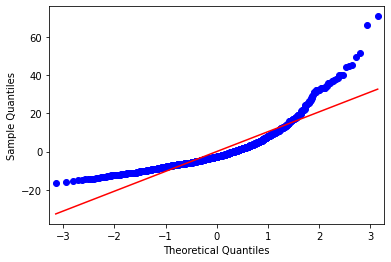

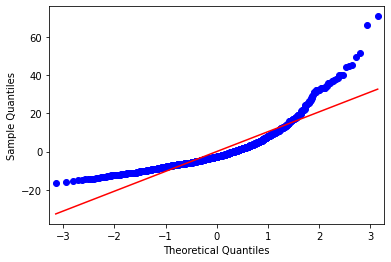

In [126]:
#QQPlot 
from statsmodels.graphics.gofplots import qqplot 
qqplot(lm_final.resid,line='s')

Text(0, 0.5, 'Residuals')

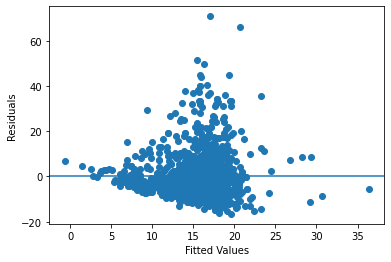

In [127]:
plt.scatter(lm_final.fittedvalues,lm_final.resid)
plt.axhline(y=0)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
#Appears to be centrally scattered but co

Text(0, 0.5, "Cook's DIstance")

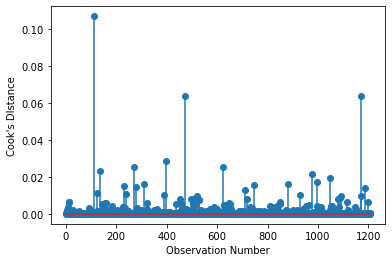

In [128]:
cooks=lm_final.get_influence().cooks_distance[0] 
plt.stem(range(len(cooks)),cooks) 
plt.xlabel('Observation Number') 
plt.ylabel("Cook's DIstance")
# No one vlaue is hugely affecting the model as they are all <0.2

In [129]:
shapiro(lm_full.resid)

ShapiroResult(statistic=0.8319002389907837, pvalue=7.898209909667299e-34)

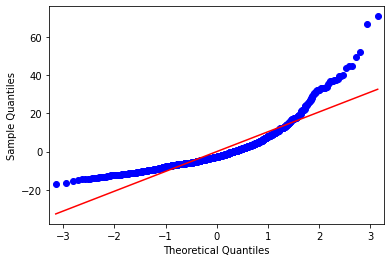

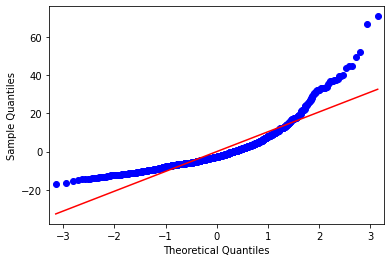

In [130]:
#QQPlot 
from statsmodels.graphics.gofplots import qqplot 
qqplot(lm_full.resid,line='s')

Text(0, 0.5, 'Residuals')

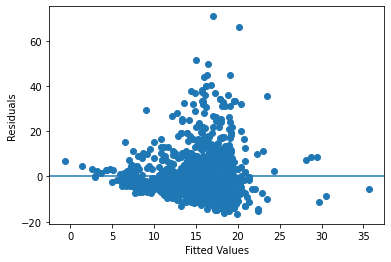

In [131]:
plt.scatter(lm_full.fittedvalues,lm_final.resid)
plt.axhline(y=0)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
#Appears to be centrally scattered but co

Text(0, 0.5, "Cook's DIstance")

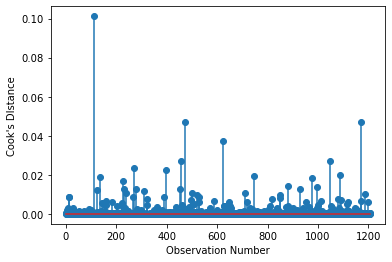

In [132]:
cooks=lm_full.get_influence().cooks_distance[0] 
plt.stem(range(len(cooks)),cooks) 
plt.xlabel('Observation Number') 
plt.ylabel("Cook's DIstance")
# No one vlaue is hugely affecting the model as they are all <0.2

In [133]:
shapiro(lm_full.resid)

ShapiroResult(statistic=0.8319002389907837, pvalue=7.898209909667299e-34)